## 目标
使用[LaTeX_OCR数据集](https://link.zhihu.com/?target=https%3A//modelscope.cn/datasets/AI-ModelScope/LaTeX_OCR)，微调Qwen2.5VL-3B-Instruct模型

## 准备数据集

### 下载数据集


In [1]:
from modelscope.msdatasets import MsDataset
ds =  MsDataset.load('AI-ModelScope/LaTeX_OCR', split='train', cache_dir='/root/autodl-tmp/modelscope/dadasets/LaTeX_OCR')
print(len(ds))
print(type(ds))

/root/miniconda3/envs/llama_factory/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 76318 examples [00:01, 58970.35 examples/s]
Generating test split: 9443 examples [00:00, 66014.22 examples/s]
Generating validation split: 8475 examples [00:00, 77192.26 examples/s]


76318
<class 'datasets.arrow_dataset.Dataset'>


text: d s ^ { 2 } = ( 1 - { \frac { q c o s \theta } { r } } ) ^ { \frac { 2 } { 1 + \alpha ^ { 2 } } } \lbrace d r ^ { 2 } + r ^ { 2 } d \theta ^ { 2 } + r ^ { 2 } s i n ^ { 2 } \theta d \varphi ^ { 2 } \rbrace - { \frac { d t ^ { 2 } } { ( 1 - { \frac { q c o s \theta } { r } } ) ^ { \frac { 2 } { 1 + \alpha ^ { 2 } } } } } .


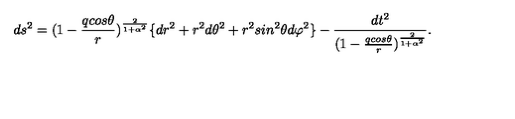

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

image =  ds[0]['image']
print(f'text: {ds[0]["text"]}')
plt.imshow(image)
plt.axis('off')  # 不显示坐标轴
plt.show()



## 转成llamaFactory数据格式

In [13]:
from datasets import load_dataset
import os
import json
from PIL import Image
from tqdm import tqdm

def save_images_and_json(ds, prompt, output_dir):
    # 创建输出目录
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # 创建一个列表来存储所有的消息和图像信息
    all_data = []

    images_dir = f"{output_dir}/images"
    if not os.path.exists(images_dir):
        os.makedirs(images_dir)

    # 遍历数据集中的每个项目
    num = 0
    for item in tqdm(ds, desc="Saving images"):
        img_path = f"{images_dir}/{num}.jpg"  # 图像保存路径

        num = num + 1
        
        image = item["image"]  # 假设这里是一个 PIL 图像对象

        # 将图像对象保存为文件
        image.save(img_path)  # 使用 PIL 的 save 方法

        # 添加消息和图像信息到列表中
        all_data.append(
            {
                "messages": [
                    {
                        "content": f"<image> {prompt}",
                        "role": "user",
                    },
                    {
                        "content": item["text"],  # 从数据集中获取的标题
                        "role": "assistant",
                    },
                ],
                "images": [img_path],  # 图像文件路径
            }
        )

    # 创建 JSON 文件
    json_file_path = f"{output_dir}/mllm_data.json"
    with open(json_file_path, "w", encoding='utf-8') as f:
        json.dump(all_data, f, ensure_ascii=False)  # 确保中文字符正常显示


save_images_and_json(ds, "这张图对应的LaTex公式是什么？", "/root/autodl-tmp/llamaFactory/datasets/latex_ocr")    

Saving images: 100%|██████████| 76318/76318 [00:27<00:00, 2809.73it/s]


In [ ]:
### 数据集注册到LLaMaFactory data
修改 LLaMaFactory data目录下的dataset_info.json，增加自定义数据集
/root/LLaMA-Factory/data
``` json
"mllm_latex_ocr": {
    "file_name": "/root/autodl-tmp/llamaFactory/datasets/latex_ocr/mllm_data.json",
    "formatting": "sharegpt",
    "columns": {
      "messages": "messages",
      "images": "images"
    },
    "tags": {
      "role_tag": "role",
      "content_tag": "content",
      "user_tag": "user",
      "assistant_tag": "assistant"
    }
  },
```

In [ ]:
## 加载原始模型
使用Lamma-Factory， 通过modescope下载Qwen2.5-VL-3B-Instruct模型

In [ ]:
## 训练
详见 [1.自我认知的训练部分](../1.自我认知/自我认知.ipynb#训练)

In [ ]:
## 导出模型
详见 [1.自我认知的合并训练模型部分](../1.自我认知/自我认知.ipynb#合并训练模型)